In [1]:
%matplotlib inline

# SYDE 522 Assignment 2
### Calvin Tran - 20826392
## Clustering and SVMs

### Due: Friday Oct 20 at 11:59pm

As with all the assignments in this course, this assignment is structured as a Jupyter Notebook and uses Python.  If you do not have Python and Jupyter Notebook installed, the easiest method is to download and install Anaconda https://www.anaconda.com/download.  There is a quick tutorial for running Jupyter Notebook from within Anacoda at https://docs.anaconda.com/free/anaconda/getting-started/hello-world/#python-exercise-jupyter under "Run Python in a Jupyter Notebook"

Implement your assignment directly in the Jupyter notebook and submit your resulting Jupyter Notebook file using Learn.

While you are encouraged to talk about the assignment with your classmates, you must write and submit your own assignment.  Directly copying someone else's assignment and changing a few small things here and there does not count as writing your own assignment.

Make sure to label the axes on all of your graphs.


### Question 1

**a) [2 marks]** The following code generates the same data that was used to demonstrate K-means clustering in class.  Note that since this question is about clustering, which is an unsupervised technique, we will not be using the `y` variable and will instead just use `x`, which will have 500 data points, each of which is two-dimensional.

```python
import sklearn.datasets
x, y = sklearn.datasets.make_blobs(
    n_samples=500, cluster_std=[1,2,0.5], random_state=8
)
```

Implement K-means clustering on this data, with k=3.  Run enough iterations for it to converge to a stable classification (probably around 4-5 iterations).  Generate a scatterplot that shows each learned category in a different colour.  For example, if you have an array `output` which contains the learned category for each item and those values were `0`, `1`, and `2`, you could generate the plot with the following code:  

```python
import matplotlib.pyplot as plt
import numpy as np
plt.figure(figsize=(6,6))
plt.scatter(x[output==0,0], x[output==0,1], label='category 0')
plt.scatter(x[output==1,0], x[output==1,1], label='category 1')
plt.scatter(x[output==2,0], x[output==2,1], label='category 2')
plt.legend()
plt.xlabel('$x_1$')
plt.ylabel('$x_2$')
plt.show()
```

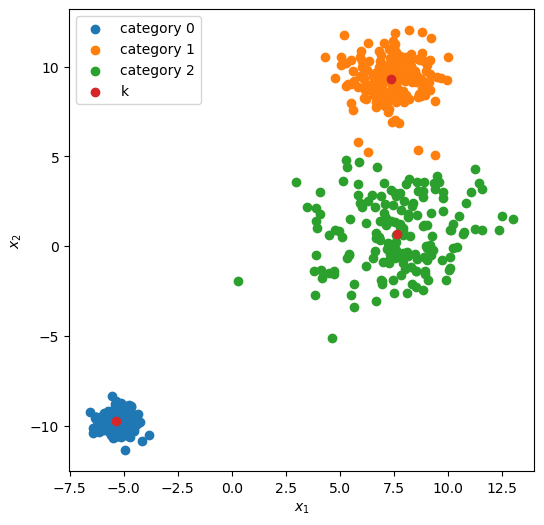

In [489]:
import sklearn.datasets
import matplotlib.pyplot as plt
import numpy as np
np.random.seed(2)
x, y = sklearn.datasets.make_blobs(
    n_samples=500, cluster_std=[1,2,0.5], random_state=8
)

def categorize(point, k):
    dist = [0]*len(k)
    for i in range(len(k)):
        dist[i] = np.sqrt((k[i][0]-point[0])**2+(k[i][1]-point[1])**2)
    return dist.index(min(dist))

# Classify all points according to the k prototypes given
def categorize_all(x, k):
    categories = [[] for _ in range(len(k))]
    for point in x:
        cat = categorize(point,k)
        categories[cat].append(point)
    return categories
        
# Choose 3 random points as the prototype
k = np.random.uniform(low=[-7.5,-10], high=[12.5,10], size=[3,2])
for i in range(6):
    categories = categorize_all(x,k)
    # Find new k
    for j in range(len(k)):
        k[j] = np.mean(categories[j], axis=0)

output = np.array([])
for point in x:
    output = np.append(output,[categorize(point,k)])

plt.figure(figsize=(6,6))
plt.scatter(x[output==0,0], x[output==0,1], label='category 0')
plt.scatter(x[output==1,0], x[output==1,1], label='category 1')
plt.scatter(x[output==2,0], x[output==2,1], label='category 2')
plt.scatter(k[:,0],k[:,1], label='k')
plt.legend()
plt.xlabel('$x_1$')
plt.ylabel('$x_2$')
plt.show()
    

**b) [1 mark]** For the same model you ran in part a), compute the "Loss" as the model is learning.  The Loss is defined as $\sqrt{{1 \over N}\sum_k \sum_i (x_i-c_k)^2}$, where N is the number of items (500), the sum over $k$ is over the 3 categories, the sum over $i$ is over the items in the current category, $x_i$ is the item itself, and $c_k$ is the prototype item for that category.  Compute the Loss after zero iterations (i.e. for the initial randomly chosen prototypes), and then after each iteration of the k-means clustering algorithm.  Generate a plot with the number of iterations on the x-axis and the Loss on the y-axis.

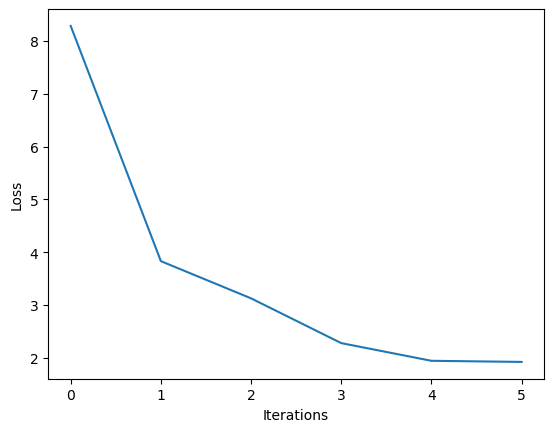

In [490]:
np.random.seed(2)

def loss(x, k):
    dist_sum = 0
    for point in x:
        cat = categorize(point,k)
        dist = (k[cat][0]-point[0])**2+(k[cat][1]-point[1])**2
        dist_sum += dist
    return np.sqrt(dist_sum/len(x))
        
# Choose 3 random points as the prototype
k = np.random.uniform(low=[-7.5,-10], high=[12.5,10], size=[3,2])
loss_vals = []

iter = 6

for i in range(iter):
    categories = categorize_all(x,k)
    loss_vals.append(loss(x, k))
    # Find new k
    for j in range(len(k)):
        k[j] = np.mean(categories[j], axis=0)

# Graph loss as number of iterations increases
plt.figure()
plt.xlabel('Iterations')
plt.ylabel('Loss')
plt.plot(list(range(iter)), loss_vals)
plt.show()

**c) [1 mark]** Perform k-means clustering on the same data, but for values of k between 1 and 14, inclusive.  For each k-value perform enough iterations for the clustering to be stable.  After it is stable, compute the Loss.  Generate a plot with the value of k on the x-axis, and the Loss on the y-axis.

Given this plot, what is a good value for k?  Why?

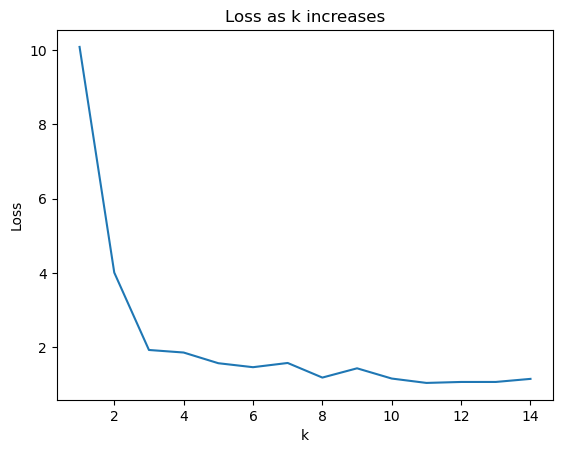

In [236]:
loss_vals = []
for i in range(1,15):
    # In this case, we use random points in x as our prototypes to avoid cases where certain categories are empty
    rand = random.sample(range(1,500),i)
    k = np.array([x[r] for r in rand])
    for j in range(10):
        categories = categorize_all(x,k)
        # Find new k
        for l in range(i):
            k[l] = np.mean(categories[l], axis=0)
    loss_vals.append(loss(x, k))

# Graph loss as number of k increases
plt.figure()
plt.xlabel('k')
plt.ylabel('Loss')
plt.plot(list(range(1,15)), loss_vals)
plt.title('Loss as k increases')
plt.show()

Using the elbow method, we see that the loss does not decrease as much after k = 3. Thus, a good value for k is 3.

### Question 2:


**a) [1 mark]** The pre-written implementation of k-means clustering can be used with the following commands:

```python
import sklearn.cluster
kmeans = sklearn.cluster.KMeans(n_clusters=3)
kmeans.fit(x)
output = kmeans.predict(x)
```

Use this implementation of k-means clustering to repeat question 1a) and generate the same plot.

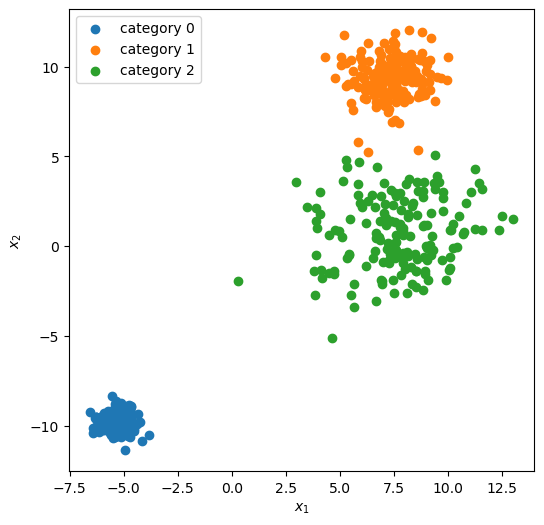

In [254]:
import sklearn.cluster
kmeans = sklearn.cluster.KMeans(n_clusters=3, n_init=10)
kmeans.fit(x)
output = kmeans.predict(x)

plt.figure(figsize=(6,6))
plt.scatter(x[output==0,0], x[output==0,1], label='category 0')
plt.scatter(x[output==1,0], x[output==1,1], label='category 1')
plt.scatter(x[output==2,0], x[output==2,1], label='category 2')
plt.legend()
plt.xlabel('$x_1$')
plt.ylabel('$x_2$')
plt.show()

**b) [1 mark]** The digit image dataset that was used in assignment 1 can be loaded with the following commands:

```python
import sklearn.datasets
digits = sklearn.datasets.load_digits()
x = digits.data
```

Use the `sklearn` implementation of k-means clustering to form 10 categories from this data.  Plot the results, using the following code which will show the first 12 items in each of the 10 categories.

```python
plt.figure(figsize=(12,12))
for i in range(10):
    indices = np.where(output==i)[0]
    for j,index in enumerate(indices[:12]):
        plt.subplot(10,12,i*12+j+1)
        plt.imshow(digits.data[index].reshape(8,8), cmap='gray_r')
        plt.xticks([])
        plt.yticks([])
        if j==0:
            plt.ylabel(f'category {i}')
plt.show()
```

How does this clustering compare to the natural clustering into the 10 digits that a person might apply to this same data?  What similarities and differences do you see?  (Note: you don't need a quantitative answer to this question; I'm looking for more qualitative answers).

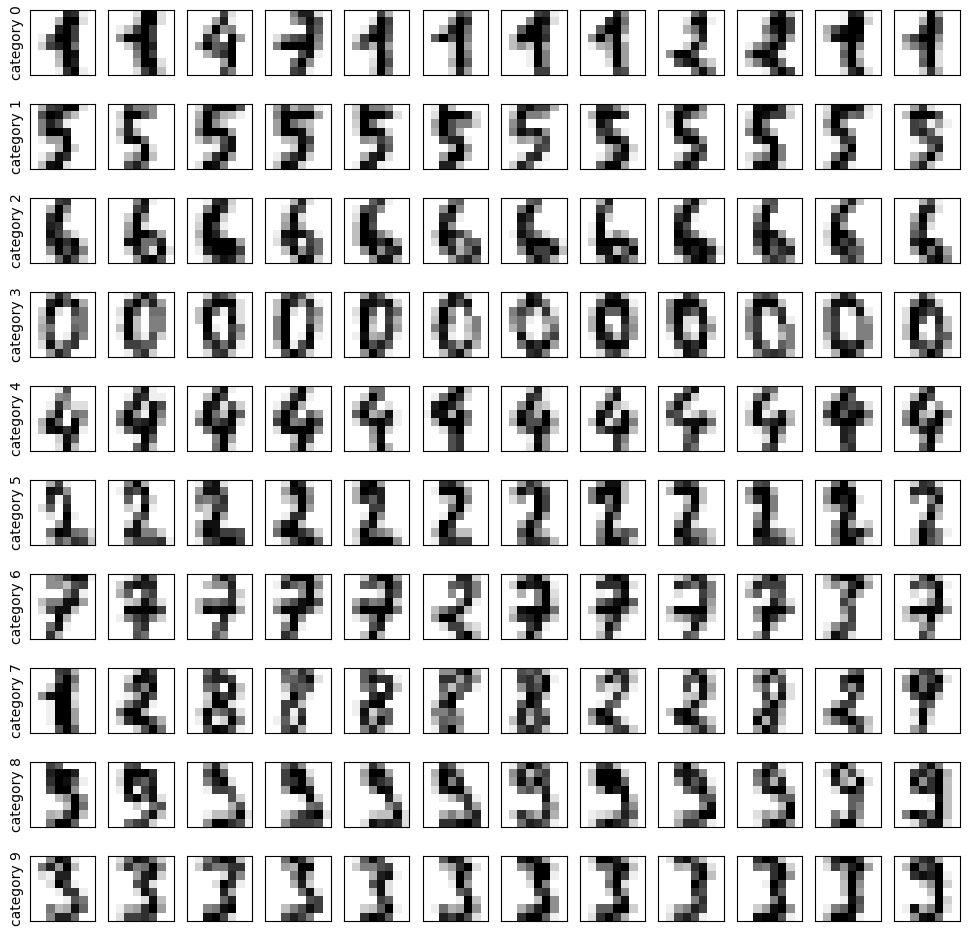

In [260]:
import sklearn.datasets
digits = sklearn.datasets.load_digits()
x = digits.data
kmeans = sklearn.cluster.KMeans(n_clusters=10, n_init=10)
kmeans.fit(x)
output = kmeans.predict(x)

plt.figure(figsize=(12,12))
for i in range(10):
    indices = np.where(output==i)[0]
    for j,index in enumerate(indices[:12]):
        plt.subplot(10,12,i*12+j+1)
        plt.imshow(digits.data[index].reshape(8,8), cmap='gray_r')
        plt.xticks([])
        plt.yticks([])
        if j==0:
            plt.ylabel(f'category {i}')
plt.show()

This clustering is similar to the natural clustering a person may apply in the sense that, for the most part, the digits are grouped together correctly into numbers 0 to 9. We do see some errors in some of the categories, especially in category 7, which contains the number 8. As with assignment 1, the number 8 seems to be the category with the most incorrect digits due to its visual similarity to other numbers.

The main difference between this clustering and a human's clustering is ordering of the digits. A human is likely to put all images showing the number 0 in category 0. Likewise, all images with number 1 would belong to category 1, etc. However, in this clustering, there is no sense of ordering in the categories and we see that the categories contain a random order of the digits between 0 and 9.

**c) [1 mark]** The following code will perform Hierarchical Clustering (also known as Agglomerative Clustering).  Apply this to the digits data from the previous question and generate the same plot.

```python
agglom = sklearn.cluster.AgglomerativeClustering(n_clusters=10)
agglom.fit(digits.data)
output = agglom.labels_
```

How does this clustering compare to the natural clustering into 10 digits and to the clustering in part b)?  What similarities and differences do you see?

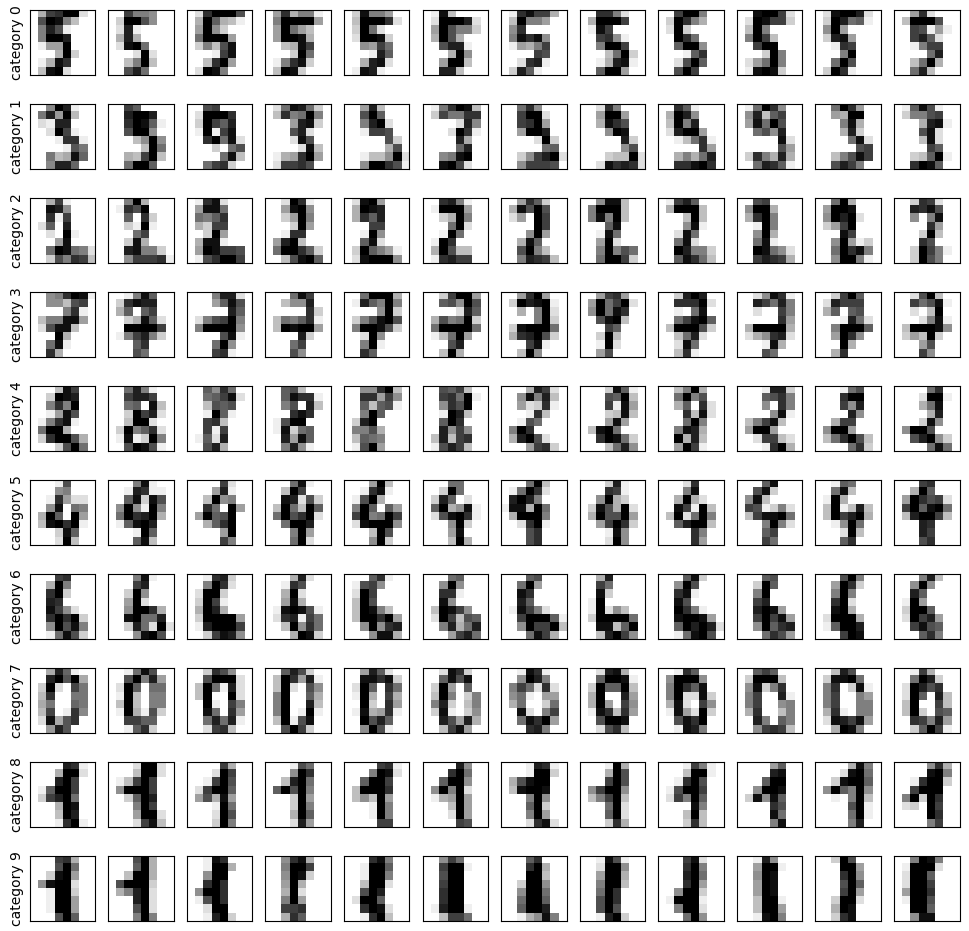

In [262]:
agglom = sklearn.cluster.AgglomerativeClustering(n_clusters=10)
agglom.fit(digits.data)
output = agglom.labels_

plt.figure(figsize=(12,12))
for i in range(10):
    indices = np.where(output==i)[0]
    for j,index in enumerate(indices[:12]):
        plt.subplot(10,12,i*12+j+1)
        plt.imshow(digits.data[index].reshape(8,8), cmap='gray_r')
        plt.xticks([])
        plt.yticks([])
        if j==0:
            plt.ylabel(f'category {i}')
plt.show()

In terms of similarity to a human's clustering and part b)'s clustering, we see that the digits in each category are somewhat visually similar. However, whereas a human's and part b)'s clustering would group the digits into numbers 0 to 9, we see that there are instead two categories containing digits that look like the number 1 (categories 8 and 9) and that images with the number 3 and 9 seem to have been grouped together in the same category (category 1). This is likely a result of the hierarchical clustering algorithm, which merges categories one at a time, instead of choosing a prototype.

### Question 3:

**a) [2 marks]** The following code generates the data used to demonstrate the SVM in class (notice that the two categories are now `1` and `-1` rather than `1` and `0`).

```python
x, y = sklearn.datasets.make_blobs(centers=[[-2, -2], [2, 2]], 
                                   cluster_std=[0.3, 1.5], 
                                   random_state=0, 
                                   n_samples=200, 
                                   n_features=2)
y[y==0] = -1
```

Implement the version of the SVM with a learning rule.  This is the version where we modify the Perceptron learning rule to produce a new learning rule that will try to minimize $\omega$ while trying to keep one category with $\omega\cdot x +b>1$ and the other with $\omega\cdot x + b < -1$.  Apply it to the data generated above.  Use a learning rate of 0.01 and a $\lambda$ value of 0.001.  Initialize it with $\omega=[0,0]$ and $b=0$.  Perform 200 iterations of the learning rule through all the data points (so the learning rule will be applied a total of 200 x 200 = 40000 times).  This should be enough for it to stablize to the optimal decision boundary.

Generate a scatterplot showing the results.  This should show the data points, coloured differently for the two categories.  Also report the final $\omega$ and $b$ values.  In addition, plot the decision boundary line $\omega\cdot x +b=0$ along with the two other boundary lines $\omega\cdot x +b=1$ and $\omega\cdot x +b=-1$.  One way to generate those lines is to use the following code:

```python
xx = np.array([-4, 8])
yy = (b-xx*w0) / w1
yy_upper = ((b+1)-xx*w0) / w1
yy_lower = ((b-1)-xx*w0) / w1
plt.plot(xx, yy)
plt.plot(xx, yy_upper)
plt.plot(xx, yy_lower)
plt.xlim(-3, 6)
plt.ylim(-3, 6)
```

The final w and b values are [0.67703052 1.01568323] and -1.490000000000001, respectively


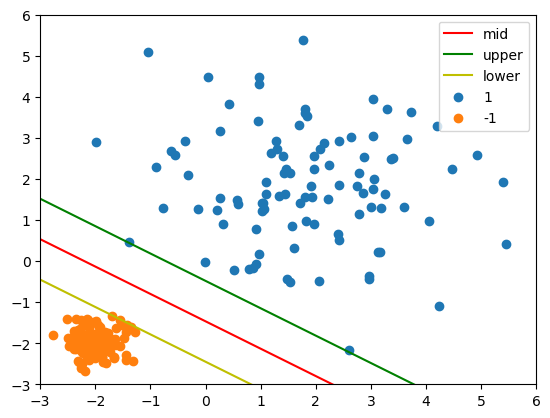

In [403]:
x, y = sklearn.datasets.make_blobs(centers=[[-2, -2], [2, 2]], 
                                   cluster_std=[0.3, 1.5], 
                                   random_state=0, 
                                   n_samples=200, 
                                   n_features=2)
y[y==0] = -1

# Initialize values
w = np.array([0.,0.])
b = 0
alpha = 0.01
lambd = 0.001

# Iterate 200 times 
for i in range(200):
    # Iterate through each point
    for j in range(len(x)):
        # If point is classified correctly, only adjust weight
        if y[j]*(np.dot(w,x[j])-b) > 1:
            w -= alpha*lambd*w
        # If point is classified incorrectly, adjust weight and b
        else:
            w -= alpha*(lambd*w - x[j]*y[j])
            b -= alpha*y[j]

# Classify points using new model
y_out = []
for point in x:
    if np.dot(w,point)-b > 0:
        y_out.append(1)
    else:
        y_out.append(-1)
y_out = np.array(y_out)

# Graph
xx = np.array([-4, 8])
yy = (b-xx*w[0]) / w[1]
yy_upper = ((b+1)-xx*w[0]) / w[1]
yy_lower = ((b-1)-xx*w[0]) / w[1]
plt.plot(xx, yy, label = 'mid', c='r')
plt.plot(xx, yy_upper, label = 'upper', c='g')
plt.plot(xx, yy_lower, label = 'lower', c='y')
plt.scatter(x[y_out==1,0], x[y_out==1,1], label = '1')
plt.scatter(x[y_out==-1,0], x[y_out==-1,1], label = '-1')
plt.xlim(-3, 6)
plt.ylim(-3, 6)
plt.legend()

print(f"The final w and b values are {w} and {b}, respectively")
plt.show()

**b) [1 mark]** For the SVM you implemented in part a), plot the magnitude of $\omega$ over the 200 interations (i.e. plot the initial value of $|\omega|=\sqrt{\omega_0^2+\omega_1^2}$, the value after applying the learning rule to each data point once, the value after applying it to each data point twice, and so on up to 200 times).  Does the resulting value for $\omega$ converge?  

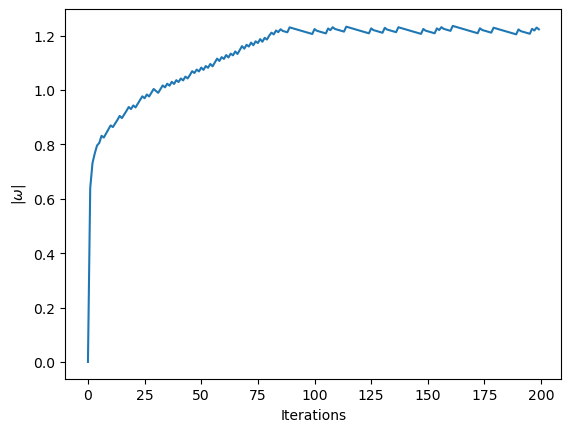

In [392]:
x, y = sklearn.datasets.make_blobs(centers=[[-2, -2], [2, 2]], 
                                   cluster_std=[0.3, 1.5], 
                                   random_state=0, 
                                   n_samples=200, 
                                   n_features=2)
y[y==0] = -1

# Initialize values
w = np.array([0.,0.])
b = 0
alpha = 0.01
lambd = 0.001
w_vals = []

# Iterate 200 times 
for i in range(200):
    w_vals.append(np.sqrt(w[0]**2 + w[1]**2))
    # Iterate through each point
    for j in range(len(x)):
        # If point is classified correctly, only adjust weight
        if y[j]*(np.dot(w,x[j])-b) > 1:
            w -= alpha*lambd*w
        # If point is classified incorrectly, adjust weight and b
        else:
            w -= alpha*(lambd*w - x[j]*y[j])
            b -= alpha*y[j]

plt.plot(list(range(200)), w_vals)
plt.xlabel("Iterations")
plt.ylabel("$|\omega|$")
plt.show()

The resulting value for $|\omega|$ converges to a value of about 1.2.

**c) [1 mark]** The following code generates the data set with two circles, one inside the other.

```python
x, y = sklearn.datasets.make_circles(n_samples=100, 
                                     shuffle=True, 
                                     noise=0.1, 
                                     random_state=0, 
                                     factor=0.3)
```

Apply your implementation of the SVM to this data and plot the result after 100 iterations.  Use the same parameters as before and generate the same plot as in part a).

The final w and b values are [-1.07723756 -0.33737838] and -0.22000000000000003, respectively


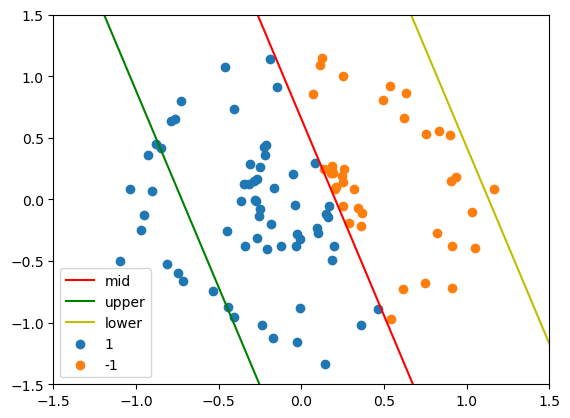

In [424]:
x, y = sklearn.datasets.make_circles(n_samples=100, 
                                     shuffle=True, 
                                     noise=0.1, 
                                     random_state=0, 
                                     factor=0.3)
y[y==0] = -1

# Initialize values
w = np.array([0.,0.])
b = 0
alpha = 0.01
lambd = 0.001
# Iterate 100 times 
for i in range(100):
    # Iterate through each point
    for j in range(len(x)):
        # If point is classified correctly, only adjust weight
        if y[j]*(np.dot(w,x[j])-b) > 1:
            w -= alpha*lambd*w
        # If point is classified incorrectly, adjust weight and b
        else:
            w -= alpha*(lambd*w - x[j]*y[j])
            b -= alpha*y[j]

# Classify points using new model
y_out = []
for point in x:
    if np.dot(w,point)-b > 0:
        y_out.append(1)
    else:
        y_out.append(-1)
y_out = np.array(y_out)
            
xx = np.array([-4, 8])
yy = (b-xx*w[0]) / w[1]
yy_upper = ((b+1)-xx*w[0]) / w[1]
yy_lower = ((b-1)-xx*w[0]) / w[1]
plt.plot(xx, yy, label = 'mid', c='r')
plt.plot(xx, yy_upper, label = 'upper', c='g')
plt.plot(xx, yy_lower, label = 'lower', c='y')
plt.scatter(x[y_out==1,0], x[y_out==1,1], label = '1')
plt.scatter(x[y_out==-1,0], x[y_out==-1,1], label = '-1')
plt.xlim(-1.5, 1.5)
plt.ylim(-1.5, 1.5)
plt.legend()

print(f"The final w and b values are {w} and {b}, respectively")
plt.show()

**d) [1 mark]** Repeat part c) but augment the data so that there is an additional feature computed as $x_1^2+x_2^2$.  This should make it possible for the SVM to learn a boundary between the datasets in the new 3-dimensional space.

Plot the resulting classification.  You just need to plot the data points, coloured by which category they are in.  You do not need to plot the decision boundaries.

The final w and b values are [-0.11683117 -0.12101299 -3.92152747] and -1.9800000000000015, respectively


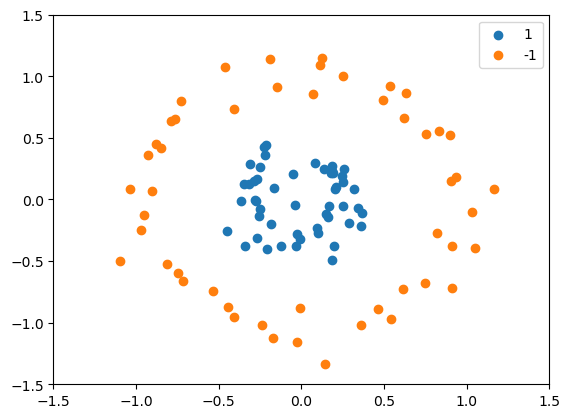

In [492]:
x, y = sklearn.datasets.make_circles(n_samples=100, 
                                     shuffle=True, 
                                     noise=0.1, 
                                     random_state=0, 
                                     factor=0.3)
y[y==0] = -1

# Augment data
aug = []
for point in x:
    aug.append(point[0]**2+point[1]**2)
aug = np.array(aug).reshape(100,1)
x = np.hstack((x,aug))

# Initialize values
w = np.array([0.,0.,0.])
b = 0
alpha = 0.01
lambd = 0.001

# Iterate 100 times 
for i in range(100):
    # Iterate through each point
    for j in range(len(x)):
        # If point is classified correctly, only adjust weight
        if y[j]*(np.dot(w,x[j])-b) > 1:
            w -= alpha*lambd*w
        # If point is classified incorrectly, adjust weight and b
        else:
            w -= alpha*(lambd*w - x[j]*y[j])
            b -= alpha*y[j]

# Classify points using new model
y_out = []
for point in x:
    if np.dot(w,point)-b > 0:
        y_out.append(1)
    else:
        y_out.append(-1)
y_out = np.array(y_out)
            
xx = np.array([-4, 8])
yy = (b-xx*w[0]) / w[1]
yy_upper = ((b+1)-xx*w[0]) / w[1]
yy_lower = ((b-1)-xx*w[0]) / w[1]
plt.scatter(x[y_out==1,0], x[y_out==1,1], label = '1')
plt.scatter(x[y_out==-1,0], x[y_out==-1,1], label = '-1')
plt.xlim(-1.5, 1.5)
plt.ylim(-1.5, 1.5)
plt.legend()

print(f"The final w and b values are {w} and {b}, respectively")
plt.show()

### Question 4:

**a) [1 mark]** The `sklearn` implementation of a Linear SVM (i.e. one with using the Kernel Trick) can be used as follows:

```python
svm = sklearn.svm.LinearSVC(C=1)
svm.fit(x, y)
output = svm.predict(x)
value = svm.decision_function(x)
```

(note that we use `predict` if we want the output to indicate a category label, but we use `decision_function` to get the value of $\omega \cdot x + b$)

Use this implementation to repeat question 3a.  Use a cost `C=100`.  Instead of plotting the decision boundary lines, use the following code to compute the output for a big grid of data points and plot the output as an image (as was done in class):

```python
extent = (-3, 6, -3, 6)
G = 200
XX, YY = np.meshgrid(np.linspace(extent[2],extent[3],G), np.linspace(extent[0],extent[1],G))
pts = np.vstack([YY.flatten(), XX.flatten()]).T
output_pts = svm.decision_function(pts)
im = plt.imshow(output_pts.reshape((G,G)).T, vmin=-1, vmax=1, cmap='RdBu',
                extent=(extent[0], extent[1], extent[3], extent[2]))
```

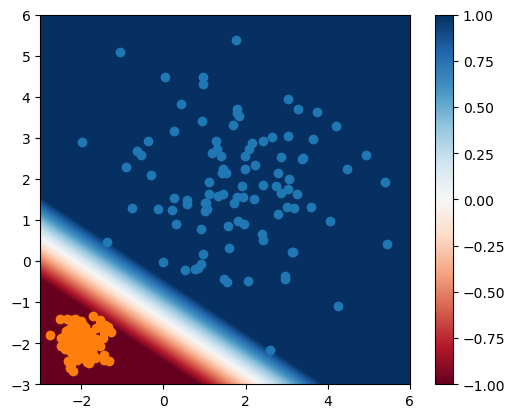

In [455]:
x, y = sklearn.datasets.make_blobs(centers=[[-2, -2], [2, 2]], 
                                   cluster_std=[0.3, 1.5], 
                                   random_state=0, 
                                   n_samples=200, 
                                   n_features=2)
y[y==0] = -1

svm = sklearn.svm.LinearSVC(C=100, dual = True, max_iter = 10000)
svm.fit(x, y)

output = svm.predict(x)

extent = (-3, 6, 6, -3)
G = 200
XX, YY = np.meshgrid(np.linspace(extent[2],extent[3],G), np.linspace(extent[0],extent[1],G))
pts = np.vstack([YY.flatten(), XX.flatten()]).T
output_pts = svm.decision_function(pts)
im = plt.imshow(output_pts.reshape((G,G)).T, vmin=-1, vmax=1, cmap='RdBu',
                extent=(extent[0], extent[1], extent[3], extent[2]))
plt.scatter(x[output==1,0], x[output==1,1], label = '1')
plt.scatter(x[output==-1,0], x[output==-1,1], label = '-1')
plt.colorbar(im)
plt.show()

**b) [1 mark]** Repeat question 4a) using the nested circles data set from 3c.  Show the resulting plot.  Now repeat this again with the same data, but using the `sklearn` implementation of an SVM with a Gaussian Radial Basis Function kernel, which can be accessed using `svm = sklearn.svm.SVC(kernel='rbf', gamma=1, C=1)`.  Use $\gamma=1$ and $C=1$.  Show the resulting plot.

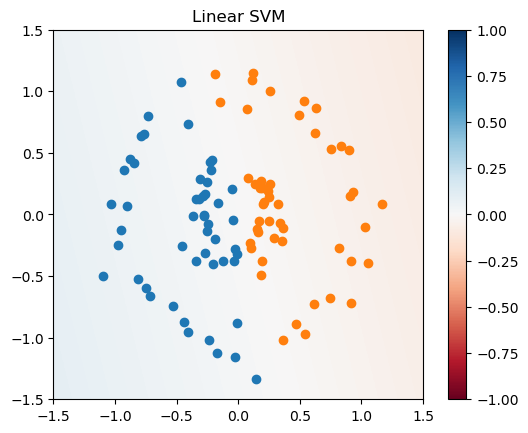

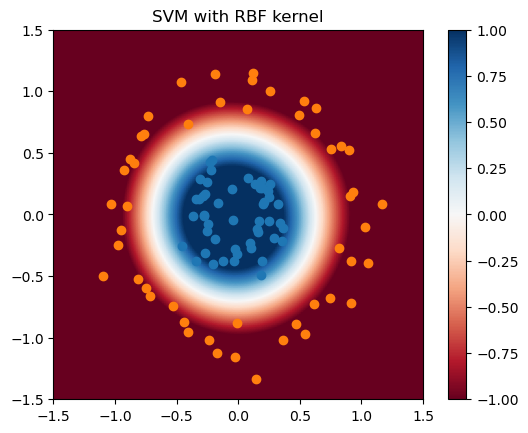

In [494]:
x, y = sklearn.datasets.make_circles(n_samples=100, 
                                     shuffle=True, 
                                     noise=0.1, 
                                     random_state=0, 
                                     factor=0.3)
y[y==0] = -1

# Using linear SVM
svm = sklearn.svm.LinearSVC(C=100, dual = True, max_iter = 10000)
svm.fit(x, y)

output = svm.predict(x)

plt.figure()
extent = (-1.5, 1.5, 1.5, -1.5)
G = 200
XX, YY = np.meshgrid(np.linspace(extent[2],extent[3],G), np.linspace(extent[0],extent[1],G))
pts = np.vstack([YY.flatten(), XX.flatten()]).T
output_pts = svm.decision_function(pts)
im = plt.imshow(output_pts.reshape((G,G)).T, vmin=-1, vmax=1, cmap='RdBu',
                extent=(extent[0], extent[1], extent[3], extent[2]))
plt.scatter(x[output==1,0], x[output==1,1], label = '1')
plt.scatter(x[output==-1,0], x[output==-1,1], label = '-1')
plt.title("Linear SVM")
plt.colorbar(im)
plt.show()

# Using RBF kernel
svm = sklearn.svm.SVC(kernel='rbf', gamma=1, C=1)
svm.fit(x, y)

output = svm.predict(x)

plt.figure()
extent = (-1.5, 1.5, 1.5, -1.5)
G = 200
XX, YY = np.meshgrid(np.linspace(extent[2],extent[3],G), np.linspace(extent[0],extent[1],G))
pts = np.vstack([YY.flatten(), XX.flatten()]).T
output_pts = svm.decision_function(pts)
im = plt.imshow(output_pts.reshape((G,G)).T, vmin=-1, vmax=1, cmap='RdBu',
                extent=(extent[0], extent[1], extent[3], extent[2]))
plt.scatter(x[output==1,0], x[output==1,1], label = '1')
plt.scatter(x[output==-1,0], x[output==-1,1], label = '-1')
plt.title("SVM with RBF kernel")
plt.colorbar(im)
plt.show()

**c) [1 mark]** Here is the code to generate the overlapping dataset discussed in class.

```python
x, y = sklearn.datasets.make_blobs(centers=[[-1, -1], [1, 1]], 
                                             cluster_std=[1, 1], 
                                             random_state=0, 
                                             n_samples=200, 
                                             n_features=2)
```

Use the methodology from class to optimize $\gamma$ and $C$.  Use 20% of the data for testing.  When doing cross-validation, split your training data into 80% training and 20% validation and repeat 40 times to take the average.  Plot the cross-validation accuracy for different $C$ and $\gamma$ values.  To generate this plot, you can use code like the following, assuming your validation accuracy scores are in a matrix `accuracy`:

```python
Cs = np.logspace(-3, 5, 25)
gammas = np.logspace(-6, 3, 28)
XX, YY = np.meshgrid(np.arange(len(gammas)), np.arange(len(Cs)))
plt.contourf(XX, YY, accuracy, levels=50)
plt.colorbar()
CS = plt.contour(XX, YY, accuracy, levels=[0,0.75,0.8,0.85, 0.9, 0.95], colors='k')
plt.clabel(CS, CS.levels, inline=True, fontsize=8)
plt.xticks(np.arange(len(gammas))[::3], gammas[::3], rotation=90)
plt.yticks(np.arange(len(Cs))[::3], Cs[::3])
```

Given your final choice of $\gamma$ and $C$, re-train on all the training data, generate the same plot as in parts a and b.  Report the accuracy of the categorization on the test data.

In [501]:
import sklearn.metrics
# Train and determine best gamma and C
x, y = sklearn.datasets.make_blobs(centers=[[-1, -1], [1, 1]], 
                                             cluster_std=[1, 1], 
                                             random_state=0, 
                                             n_samples=200, 
                                             n_features=2)
y[y==0] = -1

Cs = np.logspace(-3, 5, 25)
gammas = np.logspace(-6, 3, 28)

accuracy = []
# Record highest accuracy, as well as its corresponding C and gamma value
highest_acc = (0, 0, 0)
for i in range(len(Cs)):
    accuracy.append([])
    for j in range(len(gammas)):
        # Repeat for each combination 40 times and find average
        total_acc = 0
        for k in range(40):
            svm = sklearn.svm.SVC(kernel='rbf', gamma=gammas[j], C=Cs[i])
            # Split data
            X_train, X_test, Y_train, Y_test = sklearn.model_selection.train_test_split(
                x, y, test_size=0.2, shuffle=True,
            )
            # Train data
            svm.fit(X_train, Y_train)
            # Test data and record accuracy
            output = svm.predict(X_test)
            total_acc += sklearn.metrics.accuracy_score(Y_test, output)
        
        # Record average
        avg = total_acc/40
        if avg > highest_acc[0]:
            highest_acc = (avg, Cs[i], gammas[j])
        accuracy[i].append(avg)
print(f"The highest accuracy is {highest_acc[0]}, which occurs at a C value of {highest_acc[1]} and a gamma value of {highest_acc[2]}.")

The highest accuracy is 0.9293750000000001, which occurs at a C value of 2154.4346900318824 and a gamma value of 0.00046415888336127773.


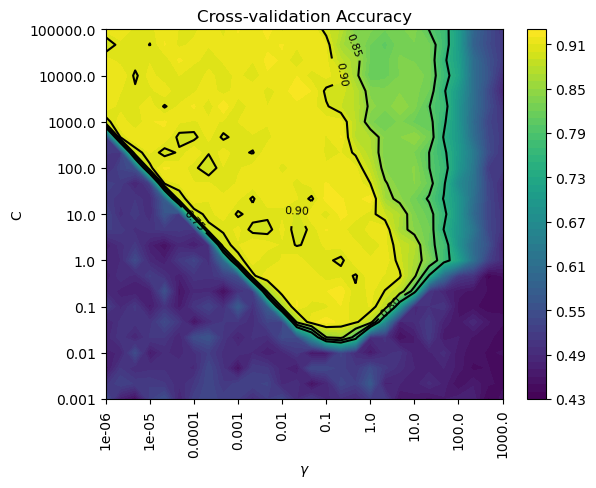

In [502]:
XX, YY = np.meshgrid(np.arange(len(gammas)), np.arange(len(Cs)))
plt.contourf(XX, YY, accuracy, levels=50)
plt.colorbar()
CS = plt.contour(XX, YY, accuracy, levels=[0,0.75,0.8,0.85, 0.9, 0.95], colors='k')
plt.clabel(CS, CS.levels, inline=True, fontsize=8)
plt.xticks(np.arange(len(gammas))[::3], gammas[::3], rotation=90)
plt.yticks(np.arange(len(Cs))[::3], Cs[::3])
plt.xlabel("$\gamma$")
plt.ylabel("C")
plt.title("Cross-validation Accuracy")
plt.show()

The accuracy of the final model on the training data is 92.0%


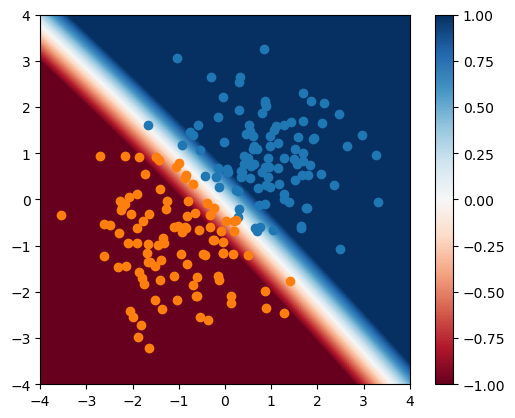

In [504]:
# Final model
x, y = sklearn.datasets.make_blobs(centers=[[-1, -1], [1, 1]], 
                                             cluster_std=[1, 1], 
                                             random_state=0, 
                                             n_samples=200, 
                                             n_features=2)
y[y==0] = -1

svm = sklearn.svm.SVC(kernel='rbf', gamma=0.000464159, C=2154.43)
svm.fit(x, y)

output = svm.predict(x)
accuracy = sklearn.metrics.accuracy_score(y, output)

print(f"The accuracy of the final model on the training data is {accuracy*100}%")
extent = (-4, 4, 4, -4)
G = 200
XX, YY = np.meshgrid(np.linspace(extent[2],extent[3],G), np.linspace(extent[0],extent[1],G))
pts = np.vstack([YY.flatten(), XX.flatten()]).T
output_pts = svm.decision_function(pts)
im = plt.imshow(output_pts.reshape((G,G)).T, vmin=-1, vmax=1, cmap='RdBu',
                extent=(extent[0], extent[1], extent[3], extent[2]))
plt.scatter(x[output==1,0], x[output==1,1], label = '1')
plt.scatter(x[output==-1,0], x[output==-1,1], label = '-1')
plt.colorbar(im)
plt.show()